In [1]:
import os
import numpy as np
import pandas as pd
from astropy.cosmology import FlatLambdaCDM
import matplotlib.pyplot as plt

from scipy.integrate import quad


H0 = 70.0  # Hubble constant in km/s/Mpc
Om0 = 0.3  # Matter density parameter (ΩM)
Ode0 = 0.7  # Dark energy density parameter (ΩΛ)


# Create a FlatLambdaCDM cosmology object
cosmo1 = FlatLambdaCDM(H0=H0, Om0=Om0) 

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


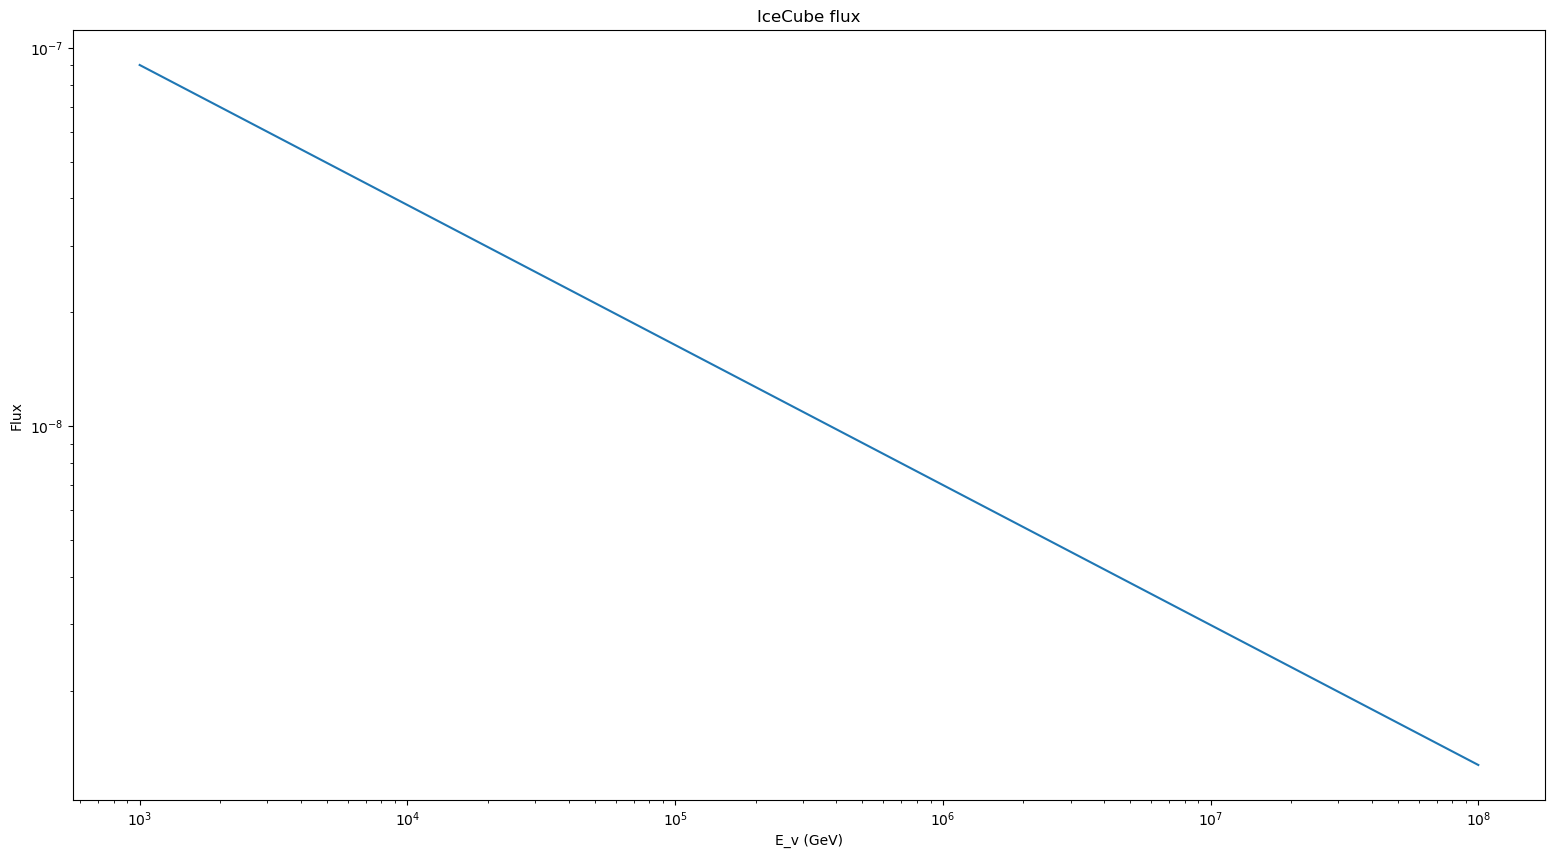

1000.0 100000000.0
5.686019219271668e-06
2.4015408873641097e-07
the measured neutrino emissivity with a redshift cap at:  9 is:  1.5768965181148127e+44 erg/Mpc^3/yr
12506.38088549719 Mpc


In [2]:
from scipy.constants import c
def ICECUBE(E_v, E_cut,gamma,phi_cut):
    return phi_cut*(E_v/100000)**(-gamma)#*np.exp(-(E_v/E_cut))


E_cut_ice = 1250000 #GeV
gamma = 2.37 #dimensionless
phi_cut = 1.64*10**(-18) #C units
E_v_list = np.linspace(1000,100000000,800) #GeV
redshift_cap = 9
convert_GeV_to_erg = 1.602*10**(-3)
convert_cm_to_Mpc = 3.24*10**(-25)
convert_s_to_yr = 60*60*24*365

plt.figure(1, figsize=(19,10))
plt.plot(E_v_list, E_v_list**2*ICECUBE(E_v_list,E_cut_ice,gamma,phi_cut))
plt.xlabel('E_v (GeV)')
plt.yscale('log',base=10)
plt.xscale('log',base=10)
plt.ylabel('Flux')
plt.title('IceCube flux')
#plt.legend()
# Show the plot
plt.show()

E1 = E_v_list[0]
E2 = E_v_list[-1]
print(E1,E2)
def integrand_f(E_v, E_cut,gamma,phi_cut):
    return E_v*ICECUBE(E_v,E_cut,gamma,phi_cut)

#*np.exp(-(E_v/E_cut))


result = quad(integrand_f, E1, E2, args=(E_cut_ice,gamma,phi_cut))
print(np.trapz(E_v_list*ICECUBE(E_v_list,E_cut_ice,gamma,phi_cut),E_v_list,dx = (E_v_list[1]-E_v_list[0])))
print(result[0])


speed_of_light = c*10**2



u_neut = result[0]/speed_of_light*4*np.pi



u_neut_erg_Mpc3 = u_neut*convert_GeV_to_erg/(convert_cm_to_Mpc)**3


emm_neut = u_neut_erg_Mpc3/cosmo1.comoving_distance(redshift_cap).value*speed_of_light*(convert_cm_to_Mpc)*(convert_s_to_yr)
print("the measured neutrino emissivity with a redshift cap at: ", redshift_cap, "is: ", emm_neut, "erg/Mpc^3/yr")
     

print(cosmo1.comoving_distance(redshift_cap+80))



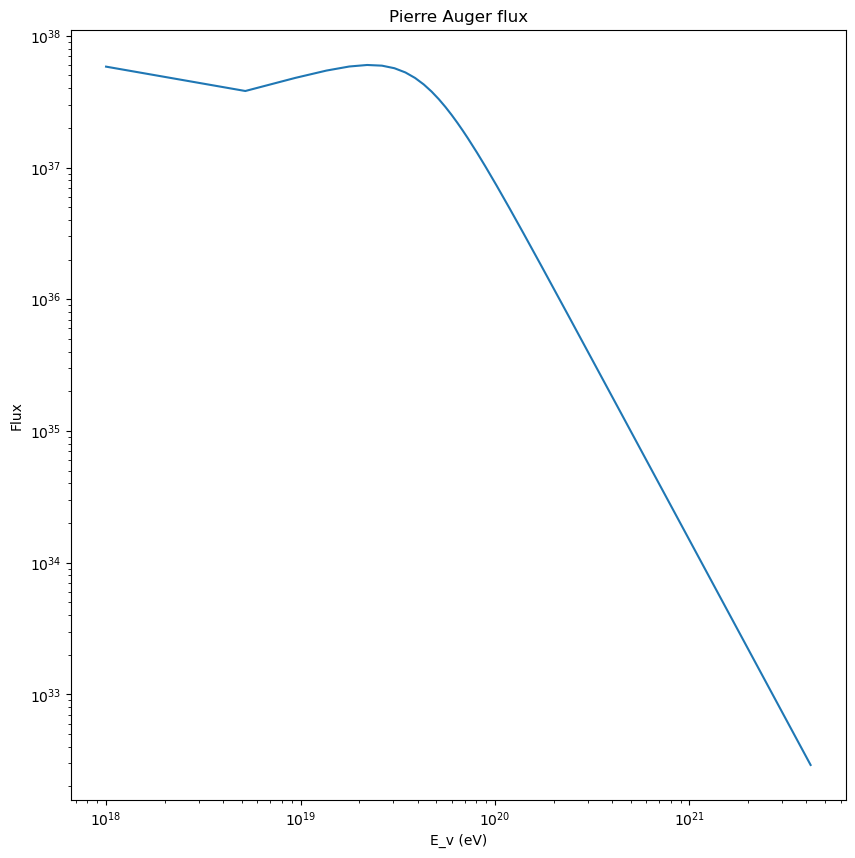

1e+18 4.2e+21
4.834465482734542e+19
299792.458
2026458083157284.8
9.540868318163437e+61
9.268568906534487e+44
the measured uhecr emissivity is:  9.268568906534487e+44 erg/Mpc^3/yr
the pierre uhecr emissivity is:  1.7156133425383276e+44 erg/Mpc^3/yr


In [3]:
from scipy.constants import c
def Pierre_auger(E_v,J_0,E_ank, gamma_d,gamma_2,E_s,gamma_1):

    if (E_v < E_ank):
        return J_0*(E_v/E_ank)**(-gamma_1)
    else:
        return J_0*(E_v/E_ank)**(-gamma_2)*(1+(E_ank/E_s)**(gamma_d))*(1+(E_v/E_s)**(gamma_d))**(-1)
E_astro = 1*10**18
E_ank = 4.82*10**18 #eV
gamma_d = 3.14 #dimensionless
gamma_2 = 2.6 #dimensionless
gamma_1 = 3.29 #dimensionless
E_max = 4.2 * 10**19 #eV
j_0 = (3.3)*10**-19
E_v_uhecr = np.linspace(E_astro,E_max*100,1000)
convert_eV_to_erg = 1.602*10**(-12)
convert_Mpc_to_km = 3.086 * 10**19
uhecr_r = 1000 #Mpc

plot_vals = []
for Ev in E_v_uhecr:
    plot_vals.append(Ev**3*Pierre_auger(Ev,j_0,E_ank, gamma_d,gamma_2,E_max,gamma_1))
plt.figure(1, figsize=(10,10))
plt.plot(E_v_uhecr, plot_vals)
plt.xlabel('E_v (eV)')
plt.yscale('log',base=10)
plt.xscale('log',base=10)
plt.ylabel('Flux')
plt.title('Pierre Auger flux')
#plt.legend()
# Show the plot
plt.show()

E1 = E_v_uhecr[0]
E2 = E_v_uhecr[-1]
print(E1,E2)
def integrand_f(E_v,J_0,E_ank, gamma_d,gamma_2,E_s):
    return E_v*Pierre_auger(E_v,J_0,E_ank, gamma_d,gamma_2,E_s,gamma_1)


result = quad(integrand_f, E1, E2, args=(j_0,E_ank, gamma_d,gamma_2,E_max))

print(result[0])


speed_of_light = c*10**-3

print(speed_of_light)

u_uhecr = result[0]*4*np.pi /speed_of_light
print(u_uhecr)

u_uhecr_erg_Mpc3 = u_uhecr*convert_eV_to_erg*( convert_Mpc_to_km)**3
print(u_uhecr_erg_Mpc3)

emm_uhecr = u_uhecr_erg_Mpc3/uhecr_r*speed_of_light/( convert_Mpc_to_km)
pierr_cal = 5.6*10**(53)/uhecr_r*speed_of_light/( convert_Mpc_to_km)*convert_s_to_yr
print(u_uhecr_erg_Mpc3/uhecr_r*speed_of_light/( convert_Mpc_to_km))
print("the measured uhecr emissivity is: ", emm_uhecr, "erg/Mpc^3/yr")

print("the pierre uhecr emissivity is: ", pierr_cal, "erg/Mpc^3/yr")
#https://arxiv.org/pdf/1509.03732.pdf



